# Analysis for salmon trap data in the Dungenesss River from 2012
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2012, the counts for wild and hatchery fish are separate.


In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [154]:
year = "2012"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [1,2,3,4]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
print(columns)

[('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Date'), ('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Time'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Up'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Time'), ('Trapping Intervals', 'Hours Fished', 'In', 'TimeIn'), ('Trapping Intervals', 'Hours Fished', 'Out', 'TimeOut'), ('Chinook0', 'Total', 'Unnamed: 6_level_2', 10), ('Chinook0', 'Hatchery', 'Unmark', '10\\12'), ('Chinook0', 'Hatchery', 'CWT1', '10\\19'), ('Chinook0', 'Hatchery', 'CWT', '10\\30'), ('Chinook0', 'Wild', 'Unmark', '10\\00'), ('Chinook1', 'Total', 'Unnamed: 11_level_2', 11), ('Chinook1', 'Hatchery', 'CWT', '11\\30'), ('Chinook1', 'Hatchery', 'ADMK', '11\\13'), ('Chinook1', 'Hatchery', 'UNMK', '11\\12'), ('Chinook1', 'Wild', 'Unmark', '11\\00'), ('Coho1', 'Total', 'Unnamed: 16_level_2', 41), ('Coho1', 'Hatchery', 'Ad-mark', '41\\13'), ('Coho1', 'Hatchery', 'Unmark', '41\\12'), ('Coho1', 'Wild', 'UC mark', '41\\

In [155]:
list_names = []
for col in df_year.columns.values:
    
    check0 = str(col[0])
    check2 = str(col[2])
    check3 = str(col[3])
    if check3[0].isdigit():
        
        if (str(col[2])[0:7] == 'Unnamed'):
            list_names.append(str(col[0]) + '_' + str(col[1]))
        else:
            list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
            
    
        
    elif check0 == 'Trapping Intervals':
        list_names.append(str(col[2]) + '_' + str(col[3]))
    
    
df_year.columns = list_names

#rename columns to be consistent with previous years
df_year = df_year.rename(columns={'Down_Date': "Date",
                        'Up_Time': "Up_time",
                        'Down_Time': "Down_time",          
                        'Up_Up': "Up_date",
                        'In_TimeIn': "In",
                        'Out_TimeOut': "Out"})

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

#make columns that are consistent with previous years
# df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"].astype(str))
# df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"].astype(str))
df_year['Up'] = pd.to_datetime(df_year['Up_date'].astype(str) + ' ' + df_year['Up_time'].astype(str), utc = False)
df_year['Down'] = pd.to_datetime(df_year['Date'].astype(str) + ' ' + df_year['Down_time'].astype(str), utc = False)
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2



In [156]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery_Unmark,Chinook0_Hatchery_CWT1,Chinook0_Hatchery_CWT,Chinook0_Wild_Unmark,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Hatchery_ADMK,Chinook1_Hatchery_UNMK,Chinook1_Wild_Unmark,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Wild_Unmark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Unmark,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Trout Parr_Wild_Total,Dolly\Bull_Wild_Smolt,Dolly\Bull_Wild_Adult,Up,Down,midpoint
0,2012-02-13,17:00:00,2012-02-14,13:18:00,20.300000,0.0,18.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-14 13:18:00,2012-02-13 17:00:00,2012-02-14 03:09:00
1,2012-02-14,13:18:00,2012-02-15,08:59:00,19.683333,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-02-15 08:59:00,2012-02-14 13:18:00,2012-02-14 23:08:30
2,2012-02-15,08:59:00,2012-02-15,16:49:00,7.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-15 16:49:00,2012-02-15 08:59:00,2012-02-15 12:54:00
3,2012-02-15,16:49:00,2012-02-16,08:58:00,16.150000,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-16 08:58:00,2012-02-15 16:49:00,2012-02-16 00:53:30
4,2012-02-16,08:58:00,2012-02-16,17:11:00,8.216667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-16 17:11:00,2012-02-16 08:58:00,2012-02-16 13:04:30
5,2012-02-16,17:11:00,2012-02-17,09:06:00,15.916667,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-17 09:06:00,2012-02-16 17:11:00,2012-02-17 01:08:30
6,2012-02-17,09:06:00,2012-02-17,17:55:00,8.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-17 17:55:00,2012-02-17 09:06:00,2012-02-17 13:30:30
7,2012-02-17,17:55:00,2012-02-18,07:50:00,13.916667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-18 07:50:00,2012-02-17 17:55:00,2012-02-18 00:52:30
8,2012-02-18,07:50:00,2012-02-18,17:46:00,9.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-18 17:46:00,2012-02-18 07:50:00,2012-02-18 12:48:00
9,2012-02-18,17:46:00,2012-02-19,08:14:00,14.466667,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-19 08:14:00,2012-02-18 17:46:00,2012-02-19 01:00:00


In [157]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()
text = text[522:-72]
text_flow = text_flow[519:-109]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])


In [158]:
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery_Unmark,Chinook0_Hatchery_CWT1,Chinook0_Hatchery_CWT,Chinook0_Wild_Unmark,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Hatchery_ADMK,Chinook1_Hatchery_UNMK,Chinook1_Wild_Unmark,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Wild_Unmark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Unmark,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Trout Parr_Wild_Total,Dolly\Bull_Wild_Smolt,Dolly\Bull_Wild_Adult,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2012-02-13,17:00:00,2012-02-14,13:18:00,20.300000,0.0,18.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-14 13:18:00,2012-02-13 17:00:00,2012-02-14 03:09:00,02/14/2012,03:00,4.1,140.0,02/14/2012,03:00,324,2
1,2012-02-14,13:18:00,2012-02-15,08:59:00,19.683333,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-02-15 08:59:00,2012-02-14 13:18:00,2012-02-14 23:08:30,02/14/2012,23:00,3.3,140.0,02/14/2012,23:00,317,2
2,2012-02-15,08:59:00,2012-02-15,16:49:00,7.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-15 16:49:00,2012-02-15 08:59:00,2012-02-15 12:54:00,02/15/2012,12:45,3.7,140.0,02/15/2012,12:45,292,2
3,2012-02-15,16:49:00,2012-02-16,08:58:00,16.150000,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-16 08:58:00,2012-02-15 16:49:00,2012-02-16 00:53:30,02/16/2012,00:45,3.3,140.0,02/16/2012,00:45,286,2
4,2012-02-16,08:58:00,2012-02-16,17:11:00,8.216667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-16 17:11:00,2012-02-16 08:58:00,2012-02-16 13:04:30,02/16/2012,13:00,4.2,140.0,02/16/2012,13:00,274,2
5,2012-02-16,17:11:00,2012-02-17,09:06:00,15.916667,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-17 09:06:00,2012-02-16 17:11:00,2012-02-17 01:08:30,02/17/2012,01:00,4.2,140.0,02/17/2012,01:00,280,2
6,2012-02-17,09:06:00,2012-02-17,17:55:00,8.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-17 17:55:00,2012-02-17 09:06:00,2012-02-17 13:30:30,02/17/2012,13:30,5.0,140.0,02/17/2012,13:30,268,2
7,2012-02-17,17:55:00,2012-02-18,07:50:00,13.916667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-18 07:50:00,2012-02-17 17:55:00,2012-02-18 00:52:30,02/18/2012,00:45,4.2,140.0,02/18/2012,00:45,279,2
8,2012-02-18,07:50:00,2012-02-18,17:46:00,9.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-18 17:46:00,2012-02-18 07:50:00,2012-02-18 12:48:00,02/18/2012,12:45,4.5,140.0,02/18/2012,12:45,282,2
9,2012-02-18,17:46:00,2012-02-19,08:14:00,14.466667,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-19 08:14:00,2012-02-18 17:46:00,2012-02-19 01:00:00,02/19/2012,01:00,3.8,140.0,02/19/2012,01:00,282,2


In [159]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery_Unmark':'Chinook0_Hat',
                                                      'Chinook0_Hatchery_CWT':'Chinook0_Hat1',
                                                      'Chinook0_Hatchery_CWT1':'Chinook0_Hat2',
                                                      'Chinook0_Wild_Unmark':'Chinook0_Wild',
                                                      'Chinook1_Hatchery_CWT':'Chinook1_Hat',
                                                      'Chinook1_Hatchery_ADMK':'Chinook1_Hat1',
                                                      'Chinook1_Hatchery_UNMK':'Chinook1_Hat2',
                                                      'Chinook1_Wild_Unmark':'Chinook1_Wild',
                                                      'Coho1_Hatchery_Ad-mark':'Coho1_Hat',
                                                      'Coho1_Hatchery_Unmark':'Coho1_Hat1',
                                                      'Coho1_Wild_UC mark':'Coho1_Wild',
                                                      'Coho1_Wild_Unmark':'Coho1_Wild1',
                                                      'Steelhead Smolts_Total':'Steelhead1_Total',
                                                      'Steelhead Smolts_Hatchery_Ad-mark':'Steelhead1_Hat',
                                                      'Steelhead Smolts_Hatchery_Unmark':'Steelhead1_Hat1',
                                                      'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild',
                                                      'Steelhead Smolts_Wild_UC mark':'Steelhead1_Wild1',
                                                      'Trout Parr_Wild_Total':'Trout Parr_Wild_Steelhead'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                                                   'Out':'sum',
                                                                   'Chinook0_Total':'sum',
                                                                   'Chinook0_Hat':'sum',
                                                                   'Chinook0_Hat1':'sum',
                                                                   'Chinook0_Hat2':'sum',
                                                                   'Chinook0_Wild':'sum',
                                                                   'Chinook1_Total':'sum',
                                                                   'Chinook1_Hat':'sum',
                                                                   'Chinook1_Hat1':'sum',
                                                                   'Chinook1_Hat2':'sum',
                                                                   'Chinook1_Wild':'sum',
                                                                   'Coho1_Total':'sum',
                                                                   'Coho1_Hat':'sum',
                                                                   'Coho1_Hat1':'sum',
                                                                   'Coho1_Wild':'sum',
                                                                   'Coho1_Wild1':'sum',
                                                                   'Steelhead1_Total':'sum',
                                                                   'Steelhead1_Wild':'sum',
                                                                   'Steelhead1_Wild1':'sum',
                                                                   'Steelhead1_Hat':'sum',
                                                                   'Steelhead1_Hat1':'sum',
                                                                   'Trout Parr_Wild_Steelhead':'sum',
                                                                   'temp':'mean',
                                                                   'flow':'mean'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)
    

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Hat2,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Hat1,Chinook1_Hat2,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Hat,Steelhead1_Hat1,Trout Parr_Wild_Steelhead,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2012-02-13,20.300000,0.0,18.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.100000,324.000000
2012-02-14,19.683333,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.300000,317.000000
2012-02-15,23.983333,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.500000,289.000000
2012-02-16,24.133333,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.200000,277.000000
2012-02-17,22.733333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.600000,273.500000
2012-02-18,24.316667,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.150000,282.000000
2012-02-19,23.733333,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750000,264.000000
2012-02-20,23.966667,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.100000,253.000000
2012-02-21,24.816667,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,4.600000,332.500000


In [137]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = (
    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1']+groupedby_dates_year['Chinook0_Hat2'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (
    groupedby_dates_year['Chinook1_Hat'] + groupedby_dates_year['Chinook1_Hat1'] + groupedby_dates_year['Chinook1_Hat2'] )/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = (
    groupedby_dates_year['Steelhead1_Hat']+groupedby_dates_year['Steelhead1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']


In [138]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

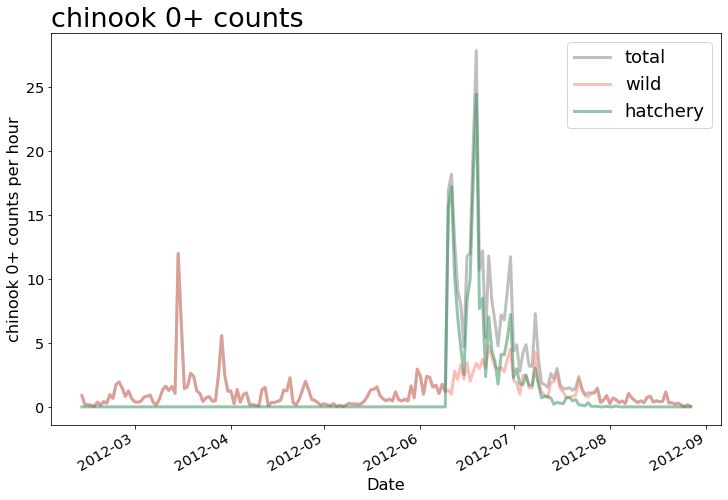

In [139]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

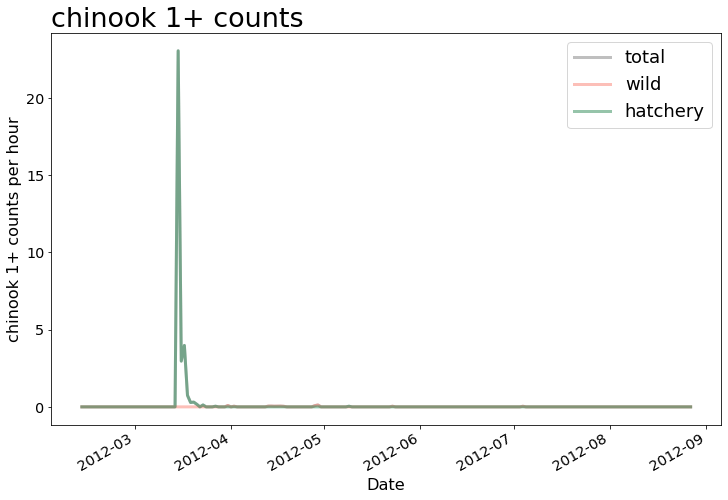

In [140]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

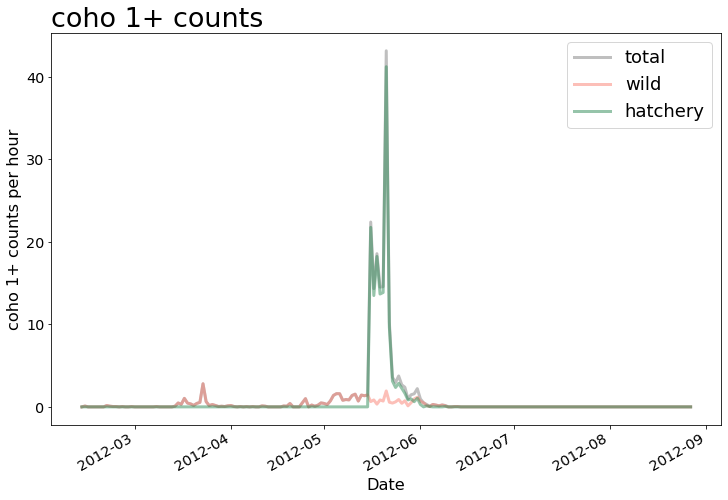

In [141]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

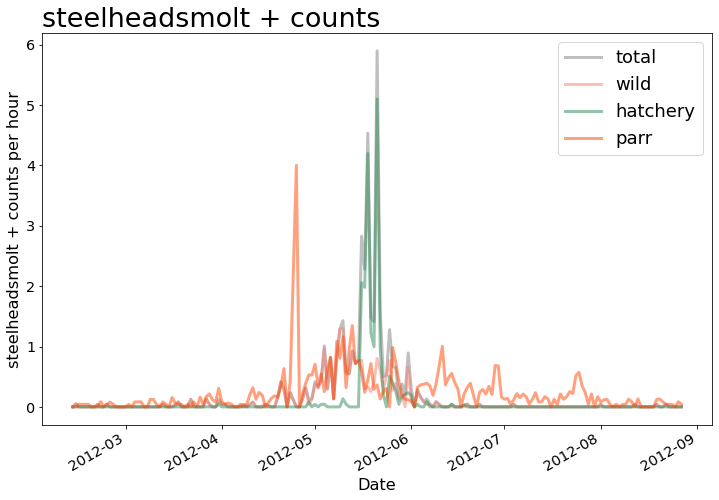

In [142]:
#steelhead
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["total","wild","hatchery","parr"])

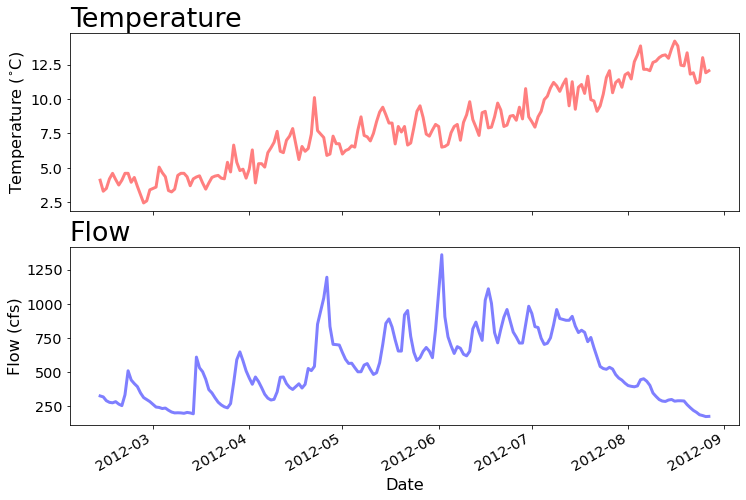

In [143]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [145]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2012_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2012_dungeness_all.csv")

In [146]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat2,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Hat1,Chinook1_Hat2,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Wild_Unmark,Steelhead1_Total,Steelhead1_Hat1,Steelhead1_Hat,Steelhead1_Wild1,Steelhead1_Wild,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Dolly\Bull_Wild_Adult,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2012-02-13,17:00:00,2012-02-14,13:18:00,20.300000,0.0,18.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-14 13:18:00,2012-02-13 17:00:00,2012-02-14 03:09:00,02/14/2012,03:00,4.1,140.0,02/14/2012,03:00,324,2
1,2012-02-14,13:18:00,2012-02-15,08:59:00,19.683333,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-02-15 08:59:00,2012-02-14 13:18:00,2012-02-14 23:08:30,02/14/2012,23:00,3.3,140.0,02/14/2012,23:00,317,2
2,2012-02-15,08:59:00,2012-02-15,16:49:00,7.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-15 16:49:00,2012-02-15 08:59:00,2012-02-15 12:54:00,02/15/2012,12:45,3.7,140.0,02/15/2012,12:45,292,2
3,2012-02-15,16:49:00,2012-02-16,08:58:00,16.150000,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-16 08:58:00,2012-02-15 16:49:00,2012-02-16 00:53:30,02/16/2012,00:45,3.3,140.0,02/16/2012,00:45,286,2
4,2012-02-16,08:58:00,2012-02-16,17:11:00,8.216667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-16 17:11:00,2012-02-16 08:58:00,2012-02-16 13:04:30,02/16/2012,13:00,4.2,140.0,02/16/2012,13:00,274,2
5,2012-02-16,17:11:00,2012-02-17,09:06:00,15.916667,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-17 09:06:00,2012-02-16 17:11:00,2012-02-17 01:08:30,02/17/2012,01:00,4.2,140.0,02/17/2012,01:00,280,2
6,2012-02-17,09:06:00,2012-02-17,17:55:00,8.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-17 17:55:00,2012-02-17 09:06:00,2012-02-17 13:30:30,02/17/2012,13:30,5.0,140.0,02/17/2012,13:30,268,2
7,2012-02-17,17:55:00,2012-02-18,07:50:00,13.916667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-18 07:50:00,2012-02-17 17:55:00,2012-02-18 00:52:30,02/18/2012,00:45,4.2,140.0,02/18/2012,00:45,279,2
8,2012-02-18,07:50:00,2012-02-18,17:46:00,9.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-02-18 17:46:00,2012-02-18 07:50:00,2012-02-18 12:48:00,02/18/2012,12:45,4.5,140.0,02/18/2012,12:45,282,2
9,2012-02-18,17:46:00,2012-02-19,08:14:00,14.466667,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012-02-19 08:14:00,2012-02-18 17:46:00,2012-02-19 01:00:00,02/19/2012,01:00,3.8,140.0,02/19/2012,01:00,282,2


In [160]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Hat2',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Hat1',
                                                  'Chinook1_Hat2',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1']+groupedby_time_year_subset['Chinook0_Hat2'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat']+groupedby_time_year_subset['Chinook1_Hat1']+groupedby_time_year_subset['Chinook1_Hat2'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_all'] = (
    groupedby_time_year_subset['Steelhead1_Hat'] + groupedby_time_year_subset['Steelhead1_Hat1'])

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat_all']/groupedby_time_year_subset['Steelhead1_Hat_all'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Hat2,Chinook0_Wild,Chinook1_Hat,Chinook1_Hat1,Chinook1_Hat2,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_all,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.000000,0.049527,0.0000,1.181576,0.000000,0.000000,0.000000,0.000000,0.007075,0.031839,0.293625,0.000000,0.187496,0.000000,0.007075,0.000000,0.099054,0.049527,0.006688,0.018799,0.000000,0.000000,0.000000,0.038914,0.004664,0.293625,0.006230,0.007075,0.003359,0.187496,0.024843,0.012936
01:00:00,0.001021,1.044521,0.0000,1.743931,0.011231,0.002042,0.001021,0.001021,0.060241,0.249133,1.730657,0.000000,0.190934,0.001021,0.091893,0.019400,0.276701,1.045542,0.141185,0.027747,0.014295,0.000098,0.045322,0.309374,0.037078,1.730657,0.036717,0.111293,0.052844,0.191955,0.025434,0.036136
02:00:00,0.009833,3.808712,0.0000,1.745933,0.092869,0.000000,0.002185,0.013111,0.109257,0.509139,1.689119,0.012018,0.204311,0.013111,0.317939,0.046981,0.619489,3.818545,0.515637,0.027779,0.095054,0.000655,0.581972,0.618397,0.074113,1.701137,0.036091,0.364920,0.173271,0.217422,0.028809,0.080903
03:00:00,0.000000,0.000000,0.0000,1.632748,0.000000,0.000000,0.000000,0.006978,0.006978,0.097686,0.000000,0.000000,0.000000,0.000000,0.055820,0.000000,0.174439,0.000000,0.000000,0.025978,0.000000,0.000000,0.309723,0.104663,0.012544,0.000000,0.000000,0.055820,0.026505,0.000000,0.000000,0.022781
04:00:00,0.000000,0.000000,0.0000,1.627034,0.763454,0.000000,0.012516,0.000000,0.000000,0.413016,0.000000,0.000000,0.000000,0.000000,0.287860,0.000000,0.413016,0.000000,0.000000,0.025887,0.775970,0.005346,0.000000,0.413016,0.049499,0.000000,0.000000,0.287860,0.136681,0.000000,0.000000,0.053939
07:00:00,0.000000,0.000000,0.0000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010607,0.000000,0.000000,0.000000,0.333333,0.039949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10:00:00,0.000000,0.000000,0.0000,10.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159105,0.666667,0.004593,0.000000,0.444444,0.053266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12:00:00,0.000000,0.023530,0.0000,0.200003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.023530,0.003177,0.003182,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.000333,0.000000,0.000000,0.000000,0.000000,0.000512
13:00:00,0.000000,0.032639,0.0051,0.552826,0.016320,0.000000,0.001020,0.000000,0.000000,0.005100,0.067318,0.000000,0.000000,0.000000,0.006120,0.000000,0.023459,0.037739,0.005096,0.008796,0.017340,0.000119,0.000000,0.005100,0.000611,0.067318,0.001428,0.006120,0.002906,0.000000,0.000000,0.003064
14:00:00,0.000000,0.143311,0.0000,0.838579,0.012770,0.000000,0.000000,0.001419,0.007095,0.014189,0.004257,0.000000,0.002838,0.000000,0.004257,0.000000,0.026959,0.143311,0.019352,0.013342,0.012770,0.000088,0.062983,0.021284,0.002551,0.004257,0.000090,0.004257,0.002021,0.002838,0.000376,0.003521


In [148]:
#function to plot fish count by hour
def fish_count_by_hour(species = "Chinook", year = "1"):
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    my_day = datetime.date(2014, 7, 15)
    x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
    if species == "Steelhead":
        width_bar=(x_dt[1]-x_dt[0])*0.3
        x_dt1 = [(t - (width_bar)) for t in x_dt]
        x_dt2 = [(t) for t in x_dt]
        x_dt3 = [(t + (width_bar)) for t in x_dt]

        
        plt.bar(
            x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
            label = 'parr', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)
        
    else:
        
        width_bar=(x_dt[1]-x_dt[0])*0.35
        x_dt1 = [(t - (width_bar/2)) for t in x_dt]
        x_dt2 = [(t + (width_bar/2)) for t in x_dt]

        if species == "Chinook":
            if year == "0":
                y_hat = groupedby_time_year_subset['Chinook0_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook0_Wild_prop']
            else:
                y_hat = groupedby_time_year_subset['Chinook1_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook1_Wild_prop']
        else:
            y_hat = groupedby_time_year_subset['Coho1_Hat_prop']
            y_wild = y = groupedby_time_year_subset['Coho1_Wild_prop']
                
        plt.bar(
            x_dt1, y_hat, color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, y_wild, color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of ' + species + year +'+', loc='left', fontsize = fs*1.5)

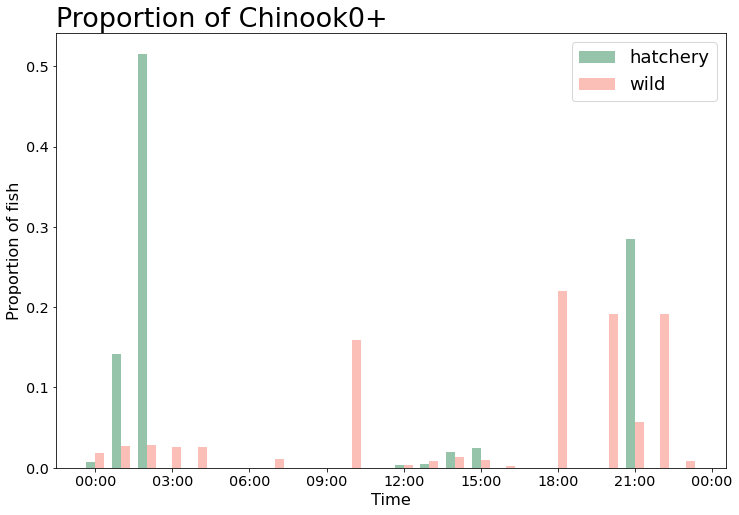

In [149]:
#chinook0
fish_count_by_hour("Chinook","0")

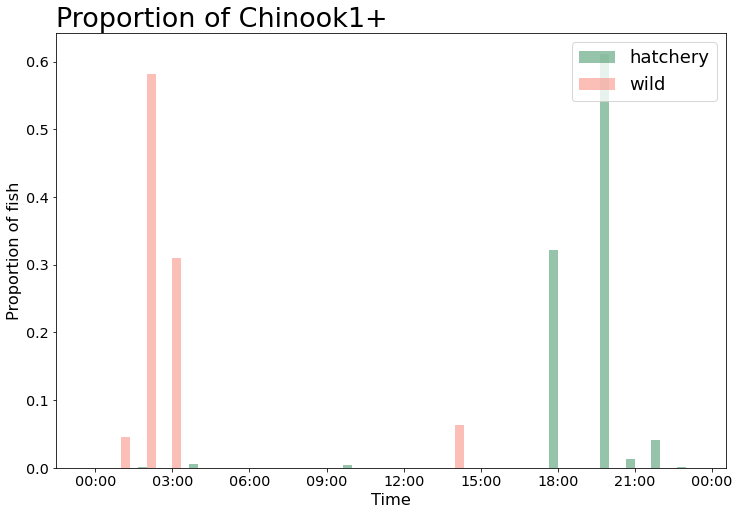

In [150]:
#chinook0
fish_count_by_hour("Chinook","1")

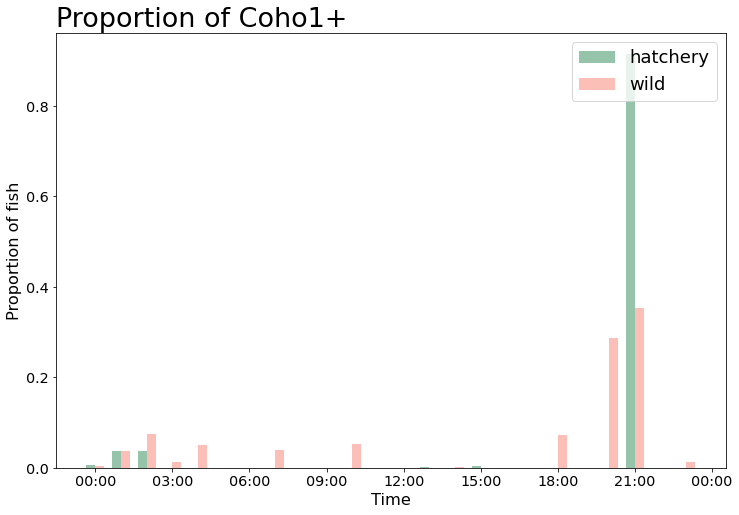

In [151]:
#chinook0
fish_count_by_hour("Coho","1")

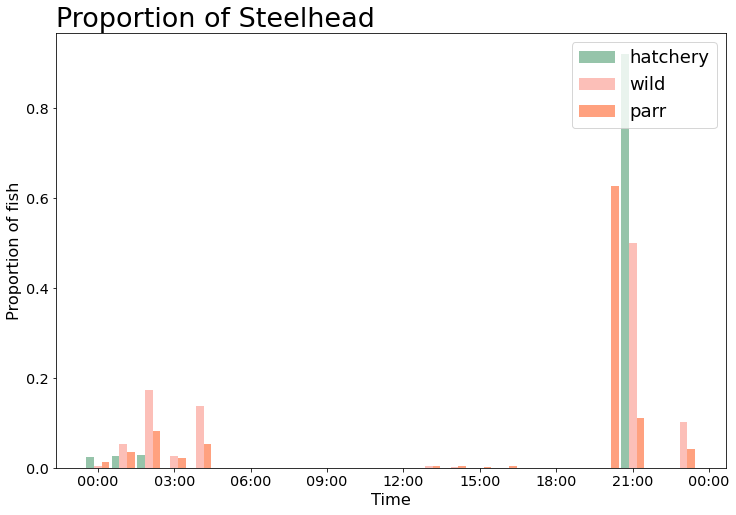

In [161]:
#chinook0
fish_count_by_hour("Steelhead","1")

In [162]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2012_dungeness_time.csv")  


In [1]:
import pandas as pd
year = "2012"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Hat2',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Hat1',
                                                  'Chinook1_Hat2',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1']+groupedby_time_year_subset['Chinook0_Hat2'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat']+groupedby_time_year_subset['Chinook1_Hat1']+groupedby_time_year_subset['Chinook1_Hat2'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_all'] = (
    groupedby_time_year_subset['Steelhead1_Hat'] + groupedby_time_year_subset['Steelhead1_Hat1'])

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat_all']/groupedby_time_year_subset['Steelhead1_Hat_all'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Hat2,Chinook0_Wild,Chinook1_Hat,Chinook1_Hat1,Chinook1_Hat2,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_all,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.004161,1.881795,0.0000,1.666697,0.065320,0.000832,0.001664,0.005825,0.067400,0.319110,1.382951,0.004577,0.177653,0.005409,0.172245,0.025795,0.384430,1.885955,0.909973,0.532483,0.067816,0.036087,0.920931,0.386511,0.626790,1.387527,0.377589,0.198040,0.613000,0.183062,0.335500,0.625481
08:00:00,0.000000,0.074515,0.0025,0.630623,0.014003,0.000000,0.000500,0.000500,0.002500,0.008502,0.041008,0.000000,0.001000,0.000000,0.004501,0.000000,0.022004,0.077015,0.037160,0.201474,0.014503,0.007717,0.079069,0.011002,0.017842,0.041008,0.011160,0.004501,0.013932,0.001000,0.001833,0.035802
16:00:00,0.000000,0.109569,0.0000,0.832725,1.785975,0.000000,0.010957,0.000000,0.087655,0.131483,2.246165,0.000000,0.361578,0.000000,0.109569,0.010957,0.208181,0.109569,0.052867,0.266042,1.796932,0.956196,0.000000,0.219138,0.355368,2.246165,0.611251,0.120526,0.373068,0.361578,0.662667,0.338718


In [2]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2012_dungeness_time_daylight.csv")  
